# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
import warnings


warnings.filterwarnings("ignore")

# leitura da base

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv = '/content/drive/MyDrive/Estatística e Ciência de Dados/4°semestre /IAI/text_book/books_data.csv'
books_data = pd.read_csv(csv)

# Data describe and cleaning

In [ ]:
# selecionando linhas aleatórias a fim de diminuir a base para melhorar o processamento(colab não aguentou)
books_data = books_data.sample(frac=.10)
books_data.shape

(21240, 10)

In [ ]:
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
149571,Telecom Churn Management (Customer Telecare Se...,"Telecom Churn Management, The Golden Opportuni...",['Rob Mattison'],http://books.google.com/books/content?id=iUcFA...,http://books.google.com/books?id=iUcFAAAACAAJ&...,Apdg Pub,2001,http://books.google.com/books?id=iUcFAAAACAAJ&...,['Technology & Engineering'],NaN
166744,The Ghosts of Africa,A sprawling fictional account of the adventure...,['William Stevenson'],http://books.google.com/books/content?id=Ny91E...,http://books.google.com/books?id=Ny91EAAAQBAJ&...,Skyhorse + ORM,2015-01-27,https://play.google.com/store/books/details?id...,['Fiction'],NaN
101483,Debretts Guide To Heraldry & Regalia,"Covers England, Scotland & European. Contains ...",['David Williamson'],NaN,http://books.google.com/books?id=1GxmAAAAMAAJ&...,NaN,1992,http://books.google.com/books?id=1GxmAAAAMAAJ&...,['Heraldry'],NaN
92072,Guarino Guarini and His Architecture,Geïllustreerde studie over het werk van de Ita...,['Harold Alan Meek'],http://books.google.com/books/content?id=PtWkx...,http://books.google.com/books?id=PtWkxi065nQC&...,Yale University Press,1988-01-01,http://books.google.com/books?id=PtWkxi065nQC&...,['Architecture'],NaN
164223,"A Woman's Best Medicine : Health, Happiness, &...","In A Woman’s Best Medicine, two physicians and...",['Nancy Lonsdorf'],http://books.google.com/books/content?id=NqlPE...,http://books.google.com/books?id=NqlPEAAAQBAJ&...,Penguin,1995-02-07,http://books.google.com/books?id=NqlPEAAAQBAJ&...,['Health & Fitness'],NaN


In [ ]:
# vamos manter titulos unicos
books_data = books_data.drop_duplicates(subset='Title')

In [ ]:
# verificando nulos na base
books_data.isna().sum()

Title                0
description       6952
authors           3201
image             5250
previewLink       2458
publisher         7700
publishedDate     2627
infoLink          2458
categories        4246
ratingsCount     16296
dtype: int64

In [ ]:
qtd_antes = books_data.shape[0]
qtd_antes

21240

In [ ]:
# Como a base é muito grande vamos somente tirar os nulos dropando eles
books_data = books_data.dropna()


In [ ]:
qtd_dpois = books_data.shape[0]
qtd_dpois

3994

In [ ]:
print(f'porcentagem de dados nulos removidos da base: {round(4124/21240,2)*100}%')

porcentagem de dados nulos removidos da base: 19.0%


In [ ]:
books_data.isna().sum()

Title            0
description      0
authors          0
image            0
previewLink      0
publisher        0
publishedDate    0
infoLink         0
categories       0
ratingsCount     0
dtype: int64

In [ ]:
# tirando colunas que não iremos usar
columns =['image','previewLink','publishedDate','infoLink','publisher','ratingsCount']
books_data.drop(columns = columns, inplace = True)
books_data.head()

,Title,description,authors,categories
179170,Ayurvedic Cooking for Westerners: Familiar Wes...,"Includes 200 recipes for healthful living, pre...",['Amadea Morningstar'],['Cooking']
156969,Is the Bible God's word?,A brief rebuttal to several points of Biblical...,['Ahmad Deedat'],['Religion']
164672,The Other America,Presents the original report on poverty in Ame...,['Michael Harrington'],['Political Science']
39432,Tulipomania : The Story of the World's Most Co...,"A vivid narration of the history of the tulip,...",['Mike Dash'],['Business & Economics']
162509,The Man Who Would Marry Susan Sontag: And Othe...,"Long before Stonewall, young Air Force veteran...",['Edward Field'],['Biography & Autobiography']


In [ ]:

# Fazendo alguns tratamentos nas categorias para tira-los da lista de generos
books_data['categories'] = books_data['categories'].str.lower() # Coloca texto em letras minusculas
books_data['categories'] = books_data['categories'].str.replace('[', '')
books_data['categories'] = books_data['categories'].str.replace(']', '')
books_data['categories'] = books_data['categories'].str.replace("'", '')
books_data['categories'] = books_data['categories'].str.replace('&', '')
books_data['categories'] = books_data['categories'].str.replace(' ', '_')
books_data['categories'] = books_data['categories'].str.replace('__', '_')

# iremos fazer o mesmo tratamento no nome dos autores
books_data['authors'] = books_data['authors'].str.lower() # Coloca texto em letras minusculas
books_data['authors'] = books_data['authors'].str.replace('[', '')
books_data['authors'] = books_data['authors'].str.replace(']', '')
books_data['authors'] = books_data['authors'].str.replace("'", '')
books_data['authors'] = books_data['authors'].str.replace('&', '')
books_data['authors'] = books_data['authors'].str.replace(' ', '_')
books_data['authors'] = books_data['authors'].str.replace('__', '_')
books_data['authors'] = books_data['authors'].str.replace('.', '')
books_data['authors'] = books_data['authors'].str.replace(',', '')
books_data['authors'] = books_data['authors'].str.replace('"', '')
books_data.head()

,Title,description,authors,categories
179170,Ayurvedic Cooking for Westerners: Familiar Wes...,"Includes 200 recipes for healthful living, pre...",amadea_morningstar,cooking
156969,Is the Bible God's word?,A brief rebuttal to several points of Biblical...,ahmad_deedat,religion
164672,The Other America,Presents the original report on poverty in Ame...,michael_harrington,political_science
39432,Tulipomania : The Story of the World's Most Co...,"A vivid narration of the history of the tulip,...",mike_dash,business_economics
162509,The Man Who Would Marry Susan Sontag: And Othe...,"Long before Stonewall, young Air Force veteran...",edward_field,biography_autobiography


In [ ]:
# verificando quantos titulos tem em cada classe
books_data['categories'].value_counts()

fiction                                                       1083
juvenile_fiction                                               322
religion                                                       285
history                                                        243
biography_autobiography                                        230
                                                              ... 
fuentes_de_oñoro,_battle_of,_fuentes_de_oñoro,_spain,_1811       1
authors,_irish                                                   1
good_and_evil                                                    1
africa                                                           1
clowns                                                           1
Name: categories, Length: 207, dtype: int64

In [ ]:
# Iremos usar onde há mais titulos para melhor treinamento do modelo
# O valor escolhido no filme é arbitrário
books_data = books_data.loc[books_data['categories'].map(books_data['categories'].value_counts()) >= 100]
books_data['categories'].value_counts()

fiction                    1083
juvenile_fiction            322
religion                    285
history                     243
biography_autobiography     230
business_economics          103
juvenile_nonfiction         100
Name: categories, dtype: int64

In [ ]:
books_data.shape

(2366, 4)

In [ ]:
# Aqui concatenamos os textos a fim de cria uma coluna unica para aplicarmos nosso processamento, e nela que iremos classificar se os filmes são parecidos
books_data['original_title']  = books_data['Title']
books_data['tags'] = books_data['description']+' '+books_data['authors']+' '+books_data['Title']
books_data.drop(columns=['description','authors','Title'], inplace=True)
books_data.head()

,categories,original_title,tags
156969,religion,Is the Bible God's word?,A brief rebuttal to several points of Biblical...
39432,business_economics,Tulipomania : The Story of the World's Most Co...,"A vivid narration of the history of the tulip,..."
162509,biography_autobiography,The Man Who Would Marry Susan Sontag: And Othe...,"Long before Stonewall, young Air Force veteran..."
13510,fiction,LifeSupport,From New York Times bestselling author Tess Ge...
76354,fiction,Prelude To Foundation,"In the year 12,020 G.E., Hari Seldon arrives i..."


In [ ]:
# removendo valores nulos
books_data.drop(books_data[books_data['tags'].isnull()].index, inplace=True)

In [ ]:
books_data.head()

,categories,original_title,tags
156969,religion,Is the Bible God's word?,A brief rebuttal to several points of Biblical...
39432,business_economics,Tulipomania : The Story of the World's Most Co...,"A vivid narration of the history of the tulip,..."
162509,biography_autobiography,The Man Who Would Marry Susan Sontag: And Othe...,"Long before Stonewall, young Air Force veteran..."
13510,fiction,LifeSupport,From New York Times bestselling author Tess Ge...
76354,fiction,Prelude To Foundation,"In the year 12,020 G.E., Hari Seldon arrives i..."


In [ ]:
books_data.reset_index(inplace=True, drop=True)

# Métodos de apoio

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [ ]:
def remove_stopwords(text,stop_words):

  # tudo para caixa baixa
  s = str(text).lower()

  tokens = word_tokenize(s)

  # remove stopwords, dígitos, caracteres especiais e pontuações
  v = [word for word in tokens if not word in stop_words and word.isalnum() and not word.isdigit()]

  return v

def stemming(tokens,stemmer):
  tokens_stems = [stemmer.stem(word) for word in tokens]
  return tokens_stems

def meu_tokenizador(doc, stop_words=nltk.corpus.stopwords.words('english'), stemmer=PorterStemmer()):
  tokens = remove_stopwords(doc,stop_words)
  return stemming(tokens,stemmer)

# Separando em treino e teste

In [ ]:
lables = books_data['categories'].to_list()
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(books_data, lables,test_size=0.30, random_state=42)

In [ ]:
df_train.head()

,categories,original_title,tags
974,fiction,The Diary of Mattie Spenser,Unexpectedly married to the man considered the...
571,religion,Understanding the New Testament and Its Message,"A solid, well-done introduction to the New Tes..."
411,fiction,Two Loves Pb,The complex moral ambiguities of seduction and...
1807,fiction,Fair Is the Rose,"Rose and Leana McBride both love the same man,..."
727,fiction,A single pebble,A young American engineer sent to China to ins...


In [ ]:
df_test.head()

,categories,original_title,tags
1078,fiction,Starfist Flashfire,When a fierce rebellion breaks out on the edge...
1668,history,the first frontier: life in colonial america,Presents a history of the period during which ...
685,history,"Tell the Court I Love My Wife: Race, Marriage,...",A history of the legal implications of interra...
1979,biography_autobiography,Angela Davis: An Autobiography,Angela Davis has been a political activist at ...
976,biography_autobiography,Carrie Stevens: Maker of Rangeley Favorite Tro...,This long-awaited book is both a history of th...


In [ ]:
y_train[0:10]

['fiction',
 'religion',
 'fiction',
 'fiction',
 'fiction',
 'juvenile_fiction',
 'fiction',
 'fiction',
 'fiction',
 'biography_autobiography']

In [ ]:
y_test[0:10]

['fiction',
 'history',
 'history',
 'biography_autobiography',
 'biography_autobiography',
 'religion',
 'religion',
 'religion',
 'fiction',
 'fiction']

# Pré-Processamento e avaliação do modelo

### BOW

In [ ]:
import string

def remove_stopwords(text,lang,domain_stopwords=[]):

  stop_words = nltk.corpus.stopwords.words(lang) # lang='portuguese' or lang='english'

  s = str(text).lower() # tudo para caixa baixa
  table = str.maketrans({key: None for key in string.punctuation})
  s = s.translate(table) # remove pontuacao
  tokens = word_tokenize(s) #obtem tokens
  v = [i for i in tokens if not i in stop_words and not i in domain_stopwords and not i.isdigit()] # remove stopwords
  s = ""
  for token in v:
    s += token+" "
  return s.strip()

# stemming
def stemming(text,lang):

  stemmer = PorterStemmer() # stemming para ingles

  if lang=='portuguese':
    stemmer = nltk.stem.RSLPStemmer() # stemming para portuguese

  tokens = word_tokenize(text) #obtem tokens

  sentence_stem = ''
  doc_text_stems = [stemmer.stem(i) for i in tokens]
  for stem in doc_text_stems:
    sentence_stem += stem+" "

  return sentence_stem.strip()

def meu_tokenizador(doc, stop_words=nltk.corpus.stopwords.words('english'), stemmer=PorterStemmer()):
  tokens = remove_stopwords(doc,stop_words)
  return stemming(tokens,stemmer)

In [ ]:
# obtendo a bag-of-words
def compute_bag_of_words(dataset,lang,domain_stopwords=[]):

  d = []
  for index,row in dataset.iterrows():
    text = row['tags'] #texto do evento
    text2 = remove_stopwords(text, lang,domain_stopwords)
    text3 = stemming(text2, lang)
    d.append(text3)

  matrix = CountVectorizer(max_features=1000)
  X = matrix.fit_transform(d)

  count_vect_df = pd.DataFrame(X.todense(), columns=matrix.get_feature_names())

  return count_vect_df



In [ ]:

bow_train = compute_bag_of_words(df_train,'english')
bow_test = compute_bag_of_words(df_test,'english')

bow_data = compute_bag_of_words(books_data, 'english')


In [ ]:
bow_train.head()

,abandon,accept,access,acclaim,accompani,account,achiev,across,act,action,...,write,writer,written,wrong,wrote,year,yet,york,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bow_test.head()

,accept,access,acclaim,account,achiev,across,act,action,activ,addit,...,write,writer,written,wrong,year,yet,york,youll,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,2,2,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
bow_train.columns

Index(['abandon', 'accept', 'access', 'acclaim', 'accompani', 'account',
       'achiev', 'across', 'act', 'action',
       ...
       'write', 'writer', 'written', 'wrong', 'wrote', 'year', 'yet', 'york',
       'young', 'youth'],
      dtype='object', length=1000)

In [ ]:
# Normalização
X_train = (bow_train - bow_train.min())/(bow_train.max()-bow_train.min())
X_test = (bow_test - bow_test.min())/(bow_test.max()-bow_test.min())

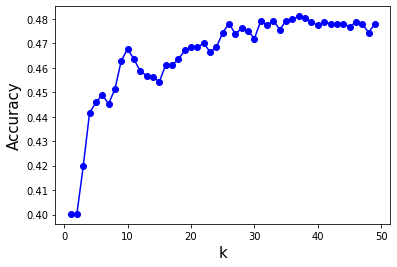

Melhor k: 37


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 50):
    knorm = KNeighborsClassifier(n_neighbors=k, weights='distance')
    # realiza a validação cruzada
    cv = cross_validate(knorm, X_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

In [ ]:
k=37

knorm = KNeighborsClassifier(n_neighbors=k,  weights='distance')
# realiza a validação cruzada
cv = cross_validate(knorm, X_train, y_train, cv=nkf)
print('accurace:', cv['test_score'].mean())

accurace: 0.48114204166357766


### Ponderação de Termos com TFIDF




In [ ]:
# obtendo a VSM com TFIDF
def compute_vsm_tfidf(dataset,lang,domain_stopwords=[]):

  d = []
  for index,row in dataset.iterrows():
    text = row['tags'] #texto do evento
    text2 = remove_stopwords(text, lang,domain_stopwords)
    text3 = stemming(text2, lang)
    d.append(text3)

  # Palavras comuns têm menos IDF
  # Palavras únicas têm alto IDF
  tfidf = TfidfVectorizer(max_features=5000)
  vectorized_data_train = tfidf.fit_transform(df_train['tags'].values)
  tfidf.get_feature_names_out()

  vectorized_dataframe = pd.DataFrame(vectorized_data_train.toarray(), index=df_train['tags'].index.tolist())


  return vectorized_dataframe


vsm_train = compute_vsm_tfidf(df_train,'english')
vsm_test = compute_vsm_tfidf(df_test,'english')


In [ ]:
vsm_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
483,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.142684,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1552,0.0,0.0,0.000000,0.0,0.0,0.037027,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vsm_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
483,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.142684,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1552,0.0,0.0,0.000000,0.0,0.0,0.037027,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Normalização
X_train = (vsm_train - vsm_train.min())/(vsm_train.max()-vsm_train.min())
X_test = (vsm_test - vsm_test.min())/(vsm_test.max()-vsm_test.min())

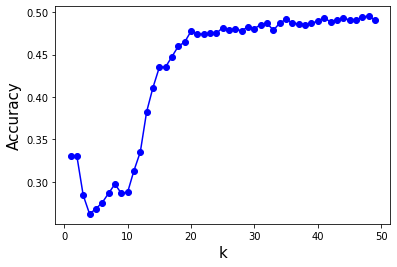

Melhor k: 48


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 50):
    knorm = KNeighborsClassifier(n_neighbors=k, weights='distance')
    # realiza a validação cruzada
    cv = cross_validate(knorm, X_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

In [ ]:
k=48

knorm = KNeighborsClassifier(n_neighbors=k, weights='distance')
# realiza a validação cruzada
cv = cross_validate(knorm, X_train, y_train, cv=nkf)
print('accurace:', cv['test_score'].mean())

accurace: 0.4951293646675069


# Iremos usar:
Por apresentar métricas semelhantes, iremos pré processessar usando bow por manter o tamanho do dataframe de teste original. Posteriormente geraremos a sugestão baseada no genero.

In [ ]:
import string

def remove_stopwords(text,lang,domain_stopwords=[]):

  stop_words = nltk.corpus.stopwords.words(lang) # lang='portuguese' or lang='english'

  s = str(text).lower() # tudo para caixa baixa
  table = str.maketrans({key: None for key in string.punctuation})
  s = s.translate(table) # remove pontuacao
  tokens = word_tokenize(s) #obtem tokens
  v = [i for i in tokens if not i in stop_words and not i in domain_stopwords and not i.isdigit()] # remove stopwords
  s = ""
  for token in v:
    s += token+" "
  return s.strip()

# stemming
def stemming(text,lang):

  stemmer = PorterStemmer() # stemming para ingles

  if lang=='portuguese':
    stemmer = nltk.stem.RSLPStemmer() # stemming para portuguese

  tokens = word_tokenize(text) #obtem tokens

  sentence_stem = ''
  doc_text_stems = [stemmer.stem(i) for i in tokens]
  for stem in doc_text_stems:
    sentence_stem += stem+" "

  return sentence_stem.strip()

def meu_tokenizador(doc, stop_words=nltk.corpus.stopwords.words('english'), stemmer=PorterStemmer()):
  tokens = remove_stopwords(doc,stop_words)
  return stemming(tokens,stemmer)

In [ ]:
# obtendo a bag-of-words
def compute_bag_of_words(dataset,lang,domain_stopwords=[]):

  d = []
  for index,row in dataset.iterrows():
    text = row['tags'] #texto do evento
    text2 = remove_stopwords(text, lang,domain_stopwords)
    text3 = stemming(text2, lang)
    d.append(text3)

  matrix = CountVectorizer(max_features=1000)
  X = matrix.fit_transform(d)

  count_vect_df = pd.DataFrame(X.todense(), columns=matrix.get_feature_names())

  return count_vect_df



In [ ]:

bow_train = compute_bag_of_words(df_train,'english')
bow_test = compute_bag_of_words(df_test,'english')

bow_data = compute_bag_of_words(books_data, 'english')


In [ ]:
# Normalização
X_train = (bow_train - bow_train.min())/(bow_train.max()-bow_train.min())
X_test = (bow_test - bow_test.min())/(bow_test.max()-bow_test.min())

In [ ]:
# conjunto de teste
knorm.fit(X_train, y_train)
X_test = np.array(X_test)

y_pred = knorm.predict(X_test)

In [ ]:
tags_test = df_test['original_title']

In [ ]:
tags_test = np.array(tags_test)

In [ ]:
print(len(tags_test))
print(len(X_test))
print(len(y_pred))

710
710
710


In [ ]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.        , 0.33333333,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_pred

array(['fiction', 'fiction', 'fiction', 'fiction', 'religion', 'fiction',
       'fiction', 'fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'juvenile_fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'fiction', 'fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'fiction', 'fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'fiction', 'fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'fiction', 'fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'fiction', 'fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'history', 'fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'juvenile_fiction', 'fiction', 'fiction', 'fiction',
       'juvenile_fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'juvenile_fiction', 'fiction', 'fiction', 'fiction', 'fiction',
       'fiction', 

In [ ]:
d = {'title':tags_test, 'predict_genre':y_pred}
data_model = pd.DataFrame(data=d)
data_model

,title,predict_genre
0,Starfist Flashfire,fiction
1,the first frontier: life in colonial america,fiction
2,"Tell the Court I Love My Wife: Race, Marriage,...",fiction
3,Angela Davis: An Autobiography,fiction
4,Carrie Stevens: Maker of Rangeley Favorite Tro...,fiction
...,...,...
705,I'm a Manatee,fiction
706,Reasoning from the Scriptures with Muslims,fiction
707,Murder at Bertram's Bower: A Beacon Hill Mystery,fiction
708,Resurrection (The Penguin classics),juvenile_fiction


In [ ]:
# comparando desempenho
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix

print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

biography_autobiography       0.00      0.00      0.00        70
     business_economics       0.00      0.00      0.00        32
                fiction       0.45      0.98      0.62       323
                history       0.00      0.00      0.00        74
       juvenile_fiction       0.12      0.02      0.03       101
    juvenile_nonfiction       0.00      0.00      0.00        25
               religion       0.00      0.00      0.00        85

               accuracy                           0.45       710
              macro avg       0.08      0.14      0.09       710
           weighted avg       0.22      0.45      0.29       710



# Recomedation genre by knn

In [ ]:
# pega os 16 livros que possuem mesmo genero
def sistem_knn(book):
  index_book = data_model[data_model['title'] == book].index[0]
  genre = data_model['predict_genre'].iloc[index_book]
  same_genre = data_model[data_model['predict_genre'] ==genre].head(16)
  same_genre = same_genre['title'].tolist()
  for i in same_genre:
    print(i)



In [ ]:
while True:
  print('Olá! Qual livro vc quer que eu recomende para você?\n')
  print('...')
  livro = input()
  if livro != 'sair':
    print(f'Gostaria de ver algo semelhante à: {livro}\n')
    print(f'tudo bem, aqui está!\n Livros com mesmo genero de {livro}')
    recomendation = sistem_knn(livro)
    print('Achou o que queria?')
    resposta = input()
    if resposta == 'sim':
      print('otimo! Fico contente:)')
      break
      livro = 'sair'
    elif resposta == 'não':
      print('uma pena, iremos aumentar nossa base para melhorar as recomendações para você!')
  else:
    break

Olá! Qual livro vc quer que eu recomende para você?

...
I'm a Manatee
Gostaria de ver algo semelhante à: I'm a Manatee

tudo bem, aqui está!
 Livros com mesmo genero de I'm a Manatee
Starfist Flashfire
the first frontier: life in colonial america
Tell the Court I Love My Wife: Race, Marriage, and Law--An American History
Angela Davis: An Autobiography
Carrie Stevens: Maker of Rangeley Favorite Trout and Salmon Flies
A History of Buddhist Philosophy: Continuities and Discontinuities
Demon Possession and the Christian: A New Perspective
The Book of Isaiah (3 volumes)
Yonnondio: From the Thirties
The Learning Tree
And to Think That We Thought That We'd Never Be Friends
Jesus, M.D.
What Winners Do to Win!: The 7 Minutes a Day That Can Change Your Life
Fierce Eden
Stalemate
Garlic and Sapphires: The Secret Life of a Critic in Disguise
Achou o que queria?
sim
otimo! Fico contente:)


# Similaridade Coseno

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()

reduced_data_train = svd.fit_transform(bow_train)
reduced_data_test = svd.fit_transform(bow_test)

reduced = svd.fit_transform(bow_data)

In [ ]:
reduced

array([[ 0.98473067,  0.67923703],
       [ 2.6597524 , -0.45120285],
       [ 2.39374458, -1.10015429],
       ...,
       [ 0.0132783 , -0.01399364],
       [ 1.72670258, -0.73905729],
       [ 1.29985312, -0.50239421]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(reduced)

In [ ]:
similarity

array([[1.        , 0.71660915, 0.51084271, ..., 0.15472335, 0.53334218,
        0.56311829],
       [0.71660915, 1.        , 0.96567579, ..., 0.79995203, 0.97219168,
        0.9799125 ],
       [0.51084271, 0.96567579, 1.        , ..., 0.92836115, 0.99965202,
        0.99807926],
       ...,
       [0.15472335, 0.79995203, 0.92836115, ..., 1.        , 0.91823362,
        0.90355249],
       [0.53334218, 0.97219168, 0.99965202, ..., 0.91823362, 1.        ,
        0.99936611],
       [0.56311829, 0.9799125 , 0.99807926, ..., 0.90355249, 0.99936611,
        1.        ]])

# Recomendation similaridade cosseno

In [ ]:
# pega os 15 livros com similaridade cosseno mais proxima
def recomendation_system(book):
    id_of_books = books_data[books_data['original_title']==book].index[0]
    distances = similarity[id_of_books]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:15]
    for books_id in movie_list:
        print(books_data['original_title'].iloc[books_id[0]])

In [ ]:
while True:
  print('Olá! Qual livro vc quer que eu recomende para você?\n')
  print('...')
  livro = input()
  if livro != 'sair':
    print(f'Gostaria de ver algo semelhante à: {livro}\n')
    print(f'tudo bem, aqui está!\n')
    recomendation = recomendation_system(livro)
    print('Achou o que queria?')
    resposta = input()
    if resposta == 'sim':
      print('otimo! Fico contente:)')
      break
      livro = 'sair'
    elif resposta == 'não':
      print('uma pena, iremos aumentar nossa base para melhorar as recomendações para você!')
  else:
    break


Olá! Qual livro vc quer que eu recomende para você?

...
Yonnondio: From the Thirties
Gostaria de ver algo semelhante à: Yonnondio: From the Thirties

tudo bem, aqui está!

The Assassin
The Town
Drive Me Wild
Dead Irish
Alfred C. Kinsey : A Public/Private Life
The Secret of Happiness
The King's Chessboard (Picture Puffins)
Prepared for Murder: A Culinary Mystery with Recipes
Conagher
Bride of Pendorric
The Seventh Commandment
When Tomorrow Comes (Canadian West #6)
When Tomorrow Comes (Canadian West)
Through a Glass, Darkly: A Commissario Guido Brunetti Mystery
Achou o que queria?
The Seventh Commandment
Olá! Qual livro vc quer que eu recomende para você?

...
The Seventh Commandment
Gostaria de ver algo semelhante à: The Seventh Commandment

tudo bem, aqui está!

When Tomorrow Comes (Canadian West #6)
When Tomorrow Comes (Canadian West)
Conagher
The King's Chessboard (Picture Puffins)
The Secret of Happiness
This Time Love: A Classic Love Story
Alfred C. Kinsey : A Public/Private Life
